<center><h1>Prueba Práctica 1</h1></center>

<h3>Nombre: Christian Pillaga S</h3>
<h3>País: El Salvador</h3>

Para esto encontré un dataset de datos actualizados del país seleccionado en el siguiente link
<br />
<center><a href="https://covid.ourworldindata.org/data/owid-covid-data.csv" style="font-weight: bold" >https://covid.ourworldindata.org/data/owid-covid-data.csv</a></center>

1. Primero importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline


2. Leemos los datos

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

df = pd.read_csv(url)
df = df[df['location'].isin(['El Salvador'])]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
16366,SLV,North America,El Salvador,2020-03-19,1.0,1.0,NaN,NaN,0.0,NaN,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16367,SLV,North America,El Salvador,2020-03-20,1.0,0.0,NaN,NaN,0.0,NaN,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16368,SLV,North America,El Salvador,2020-03-21,3.0,2.0,NaN,NaN,0.0,NaN,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16369,SLV,North America,El Salvador,2020-03-22,3.0,0.0,NaN,NaN,0.0,NaN,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16370,SLV,North America,El Salvador,2020-03-23,3.0,0.0,NaN,NaN,0.0,NaN,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16612,SLV,North America,El Salvador,2020-11-20,37109.0,144.0,154.143,1064.0,3.0,4.429,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16613,SLV,North America,El Salvador,2020-11-21,37250.0,141.0,150.714,1070.0,6.0,4.429,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16614,SLV,North America,El Salvador,2020-11-22,37250.0,0.0,127.429,1075.0,5.0,4.429,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674
16615,SLV,North America,El Salvador,2020-11-23,37562.0,312.0,172.000,1081.0,6.0,4.857,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.65,1.3,73.32,0.674


In [3]:
df = df.loc[:,['date','total_cases']] 
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,total_cases
16366,78,1.0
16367,79,1.0
16368,80,3.0
16369,81,3.0
16370,82,3.0
...,...,...
16612,324,37109.0
16613,325,37250.0
16614,326,37250.0
16615,327,37562.0


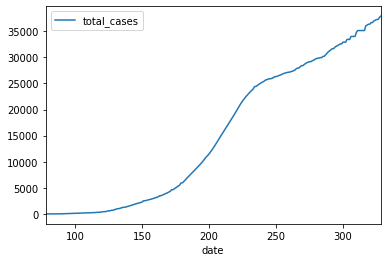

In [4]:
df.plot(x ='date', y='total_cases')

▪	Generar un modelo matematico de predicción para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

In [5]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

### Modelo Lineal

In [6]:

regr = linear_model.LinearRegression()
 
regr.fit(np.array(x).reshape(-1, 1) ,y)

print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

y_prediccion = regr.predict([[335]])
print('Despues de 7 días tendremos: ', int(y_prediccion), ' casos')

Coefficients: 
 [178.96072093]
Independent term: 
 -21102.169774236387
Despues de 7 días tendremos:  38849  casos


[1.0, 1.0, 3.0, 3.0, 3.0, 5.0, 9.0, 13.0, 13.0, 13.0, 19.0, 30.0, 32.0, 32.0, 41.0, 46.0, 56.0, 62.0, 69.0, 78.0, 78.0, 103.0, 117.0, 118.0, 118.0, 125.0, 149.0, 159.0, 159.0, 164.0, 177.0, 190.0, 201.0, 218.0, 225.0, 237.0, 250.0, 261.0, 298.0, 298.0, 323.0, 345.0, 377.0, 424.0, 446.0, 446.0, 555.0, 587.0, 587.0, 695.0, 695.0, 784.0, 889.0, 958.0, 998.0, 1037.0, 1112.0, 1210.0, 1265.0, 1265.0, 1338.0, 1413.0, 1498.0, 1571.0, 1640.0, 1725.0, 1819.0, 1915.0, 1983.0, 2042.0, 2109.0, 2194.0, 2278.0, 2517.0, 2517.0, 2582.0, 2653.0, 2705.0, 2781.0, 2849.0, 2934.0, 3015.0, 3104.0, 3191.0, 3274.0, 3481.0, 3481.0, 3603.0, 3720.0, 3826.0, 3941.0, 4066.0, 4200.0, 4329.0, 4626.0, 4626.0, 4808.0, 4973.0, 5150.0, 5336.0, 5517.0, 5934.0, 5934.0, 6173.0, 6438.0, 6736.0, 7000.0, 7267.0, 7507.0, 7777.0, 8027.0, 8307.0, 8566.0, 8844.0, 9142.0, 9391.0, 9674.0, 9978.0, 10303.0, 10645.0, 10957.0, 11207.0, 11508.0, 11846.0, 12207.0, 12582.0, 12975.0, 13377.0, 13792.0, 14221.0, 14630.0, 15035.0, 15446.0, 158

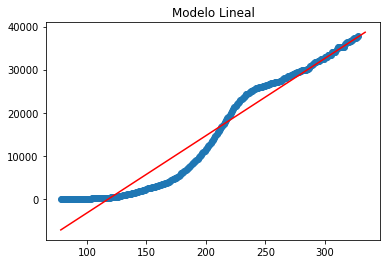

In [7]:
plt.scatter(x, y, label="Datos Reales")
x_real = np.array(range(78, 335))
print(y) #Mostramos los casos que hay para cada fecha
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red', label="Modelo Lineal")
plt.title("Modelo Lineal")
plt.show()

### Modelo Exponencial

[ 2.39923696e+02  1.04492359e-02 -1.73137599e+02]
Despues de 7 días tendremos:  59812.0  casos


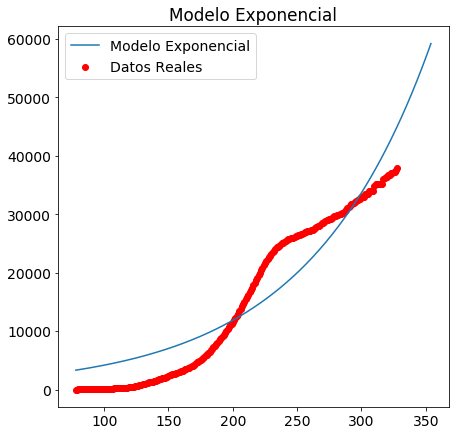

In [8]:
def modelo_exponencial(x, a, b,c):
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=6000)
print(popt)
pred_x = np.array(range(78,355)) # Predecir 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(pred_x, [modelo_exponencial(i,popt[0],popt[1],popt[2]) for i in pred_x], label="Modelo Exponencial" )

print("Despues de 7 días tendremos: ",round(modelo_exponencial(355,popt[0],popt[1],popt[2])), ' casos')
plt.legend()
plt.title("Modelo Exponencial")
plt.show()
print()

### Modelo Polinómico

Despues de 7 días tendremos:  33960.0


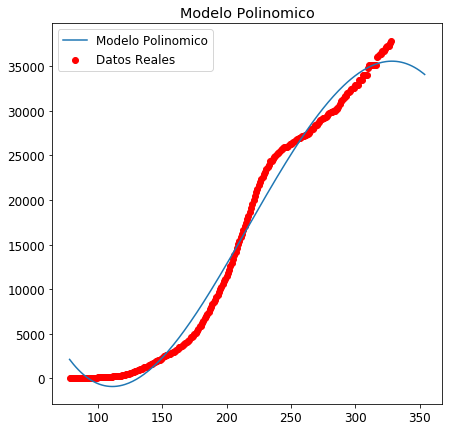

In [9]:
modelo_polinomial = {}
prediccion = 0

for grado in range(4,5):
    resultados_modelo = np.polyfit(x, y, grado, full=True)
    modelo_polinomial[grado] = resultados_modelo

plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=12)
plt.scatter(x,y,label="Datos Reales",color="red")

prediccion_x = np.array(range(78,355))
for grado, modelo in modelo_polinomial.items():
    coeficientes, error, *_ = modelo
    prediccion = np.poly1d(coeficientes)
    print("Despues de 7 días tendremos: ",round(prediccion(355)))
    plt.plot(prediccion_x, prediccion(prediccion_x), "-", label="Modelo Polinomico")
plt.legend()
plt.title("Modelo Polinomico")
plt.show()

### Modelo Logarítmico

In [10]:
def modelo_logaritmico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logaritmico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-148722.6121393 ,   31285.23064977]), array([[16621256.45955038, -3153668.73567356],
       [-3153668.73567356,   601790.62980389]]))


Despues de 7 días tendremos:  34988.0  casos


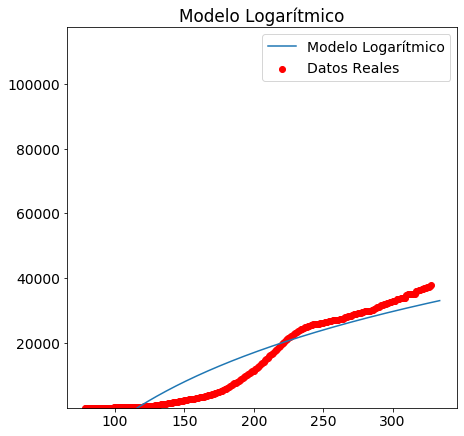

In [11]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logaritmico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logarítmico" )
print("Despues de 7 días tendremos: ",round(modelo_logaritmico(355,exp_fit[0][0],exp_fit[0][1])), ' casos')
plt.legend()
plt.title("Modelo Logarítmico")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

▪	Generar un modelo probabilistico con los datos.

In [12]:
filtro =df['total_cases'] # Filtro los datos que se empezo a tener casos

media = filtro.mean()
mediana = filtro.median()
print('Mediana', mediana)
print('Media', media)

Mediana 12582.0
Media 15226.85657370518


In [13]:
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias

print(y[-1])
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

37884.0
50466


En 7 dias el numero de casos es 125958


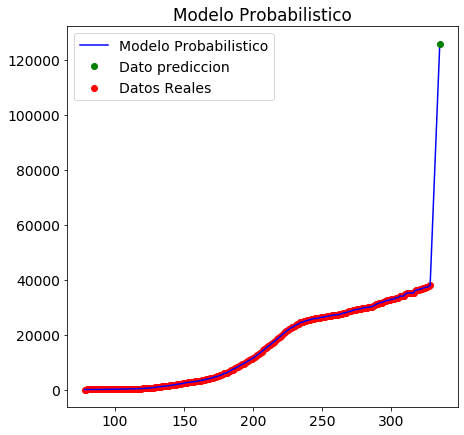

In [14]:
plt.scatter(x, y,label="Datos Reales", color='red')
plt.plot()

for i in range(x[-1]+1, x[-1]+8):
    x.append(i)
    y.append(int(y[-1] + mediana))

plt.plot(x,y,label="Modelo Probabilistico", color="blue")
print('En 7 dias el numero de casos es', y[-1])
plt.plot(x[-1],y[-1],'go', label='Dato prediccion')
plt.legend()
plt.title("Modelo Probabilistico")
plt.show()

### Conclusiones

•	Cual tiene una mejor predicción

Según lo visto en todos los modelos el que tiene mejor predicción es el modelo Probabilistico ya que este se ajusta de mejor manera a los datos reales y es un número mas considerable que el de los otros modelos, se podría decir tambien que el modelo polinomial en grado mayor ya que se acoplaba un poco al modelo real pero en la predicción nos daba un valor negativo por lo cual, el MODELO PROBABILÍSTICO es el mejor.

•	Ventajas y desventajas de los modelos

#### Ventajas

- No requiere de gran volumen de datos históricos.

- Al ser un modelo polinomial, es más preciso, ya que dependiendo del grado se adaptara a la realidad que se desee estudiar.

- Trabaja bien sobre datos no lineales.

- Las funciones exponenciales pueden ser utilizadas para realizar aproximaciones a valores muy altos.


#### Desventajas

- No producen una función de regresión fácilmente representable por una fórmula matemática.

- En caso del polinomico se requiere elegir el grado correcto del para una buena predicción.

•	Cual es el principal problema del modelo probabilistico

Para mi parecer el modelo probabilistico se adapta a la realidad solo hasta el rango de datos reales el problema surge al momento de predecir, ya que cada dia va a ir aumentando su valor de acuerdo a la mediana lo cual va a tener una predicción más alta.